# NLP analysis: tag information get from meituan and dazhong app
- Author: Yiran Jing


- Create Wordcloud with Chinese
- Frequency bar plot


In [3]:
import requests
import json
from lxml import etree
import pandas as pd
import re
import math
import urllib
import urllib.request as urllib2
import xlsxwriter
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
from pyquery import PyQuery as pq
import scrapy
from scrapy.crawler import CrawlerProcess
from scrapy.utils.project import get_project_settings
import csv

In [4]:
import jieba # to support chinese
jieba.enable_parallel(4)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/1l/pfc4n6891k7350ty2zvn2mx40000gn/T/jieba.cache
Loading model cost 0.777 seconds.
Prefix dict has been built succesfully.


### Combine different app information
#### load data from meituan

In [5]:
tags_meituan  = pd.read_csv("../../data/meituanZhangYeyeInfos/Zhangyeye_Tags.csv")

#### load data from dazhong

In [6]:
tags_dazhong  = pd.read_csv("../../data/dazhongZhangYeyeInfos/Zhangyeye_Tags_dazhongdianping_08032019.csv")

#### combine two app information
merge counts if they have same tags

In [7]:
tags_info = pd.concat([tags_meituan, tags_dazhong[['标签','累计数量']]])

In [8]:
## merge counts if they have same tags 
aggregation_functions = {'标签': 'first','累计数量': 'sum'}
df_new = tags_info.groupby(tags_info['标签']).aggregate(aggregation_functions)
df_new.to_csv('../../data/tagInfos/Tags_zhangyeye_08032019.csv',index=False,encoding='utf_8_sig')

### Load data 

In [9]:
tags_info  = pd.read_csv("../../data/tagInfos/Tags_zhangyeye_08032019.csv")
bag = tags_info
bag

,标签,累计数量
0,上菜快,30
1,主食赞,32
2,交通便利,28
3,价格实惠,19
4,价格高,4
5,体验很棒,13
6,分量少,10
7,分量足,143
8,午餐,36
9,味道赞,188


In [10]:
range(25)

range(0, 25)

### Frequency plot

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

# 调整package可以显示中文
chinesefont = matplotlib.font_manager.FontProperties(fname='../fonts/STFangSong.ttf')


fig,ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(range(25), bag['累计数量']
       )
fig.suptitle(u'用户总体标签（美团，大众点评）', fontproperties=chinesefont, fontsize=18)
plt.xlabel(u'标签',fontproperties=chinesefont,fontsize=18)  
plt.ylabel(u'数量（%）',fontproperties=chinesefont,fontsize=16)  
plt.show()   

<Figure size 640x480 with 1 Axes>

### Create bag of word model
saved in text file

In [12]:
file = open("../../data/tagInfos/Tags_zhangyeye_08032019.txt","w")
for index,row in tags_info.iterrows():
    for i in range(row['累计数量']): 
        file.write(row['标签'])
        file.write(" ")
file.close() 

text = open('../../data/tagInfos/Tags_zhangyeye_08032019.txt', 'r',encoding= 'UTF-8-sig').read()

In [13]:
#text = ' '.join(jieba.cut(text))

In [14]:
from PIL import Image
import numpy as np
icon_path = '../fonts/heart.png'
icon = Image.open(icon_path)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

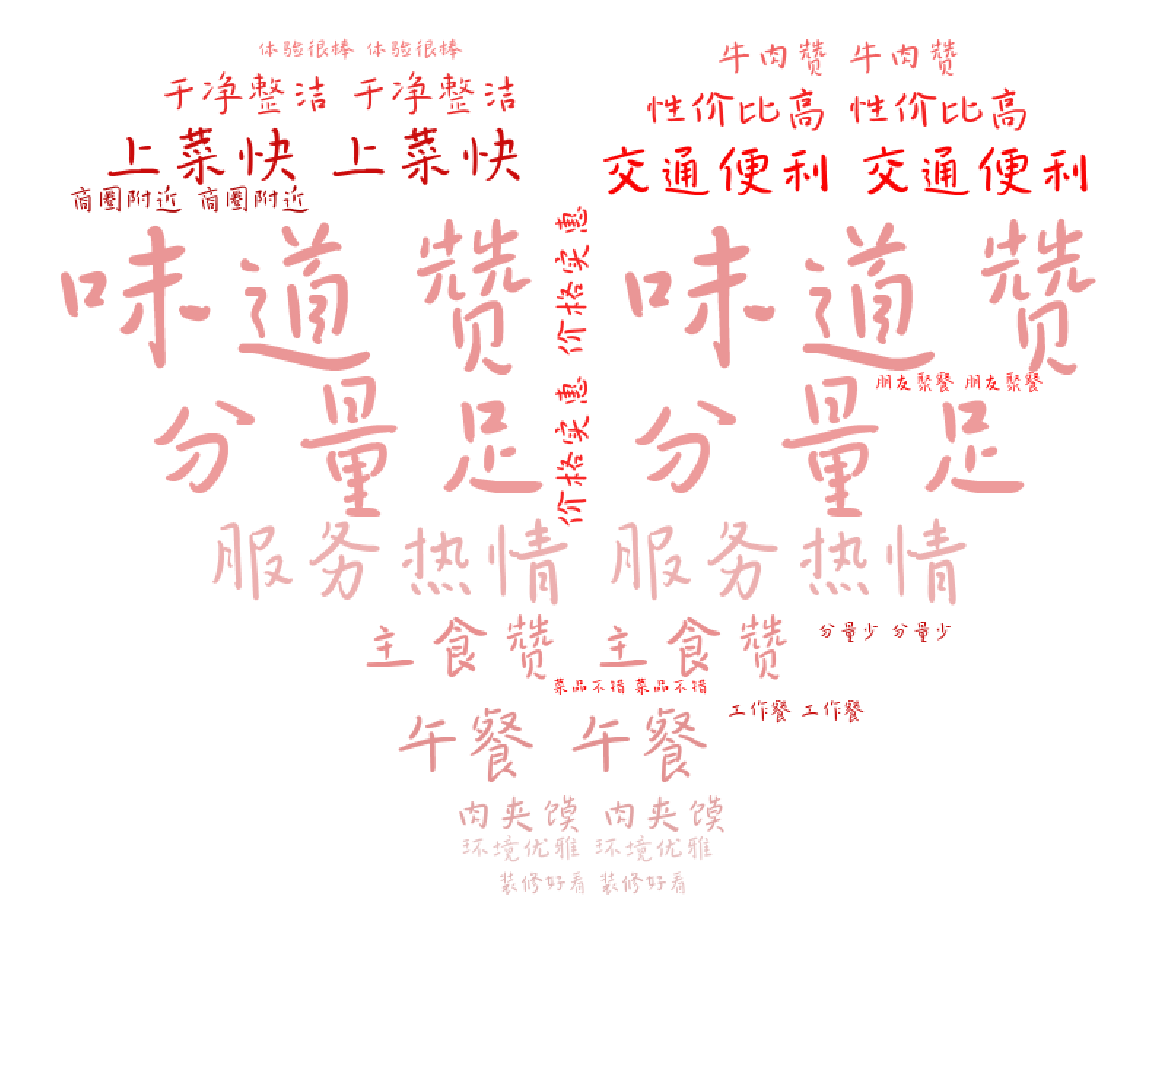

In [15]:
import jieba
from scipy.misc import imread

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple([255,255,255]) # RGB code of white color

from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)


# indicate the font path that can display Chinese
font_filename = '../fonts/HanyiSentyLotus.ttf'

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path=font_filename, background_color="white",
               random_state=50,#随机角度
               max_words=20, mask = mask, max_font_size=200)
wc.generate_from_text(text)
wc.recolor(color_func=color_func, random_state=2)
# save as png
output_path = 'wordcloud.png'
wc.to_file(output_path)
# display the word cloud
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(wc)
plt.axis("off")
plt.show()